In [1]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [34]:
# get titanic & test csv files as a DataFrame
train_df = pd.read_csv("../input/train.csv", dtype={"Age": np.float64}, )
test_df    = pd.read_csv("../input/test.csv", dtype={"Age": np.float64}, )
# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
from sklearn.ensemble import RandomForestRegressor
def set_missing_ages(df):
    age_df=df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    known_age = age_df[age_df.Age.notnull()]
    unknown_age = age_df[age_df.Age.isnull()]
    X=known_age.drop(['Age'],axis=1)
    y=known_age['Age']
    rfr=RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X,y)
    X_unknown=unknown_age.drop(['Age'],axis=1)
    y_unknown=rfr.predict(X_unknown)
    df.loc[ (df.Age.isnull()), 'Age' ]=y_unknown
    return df, rfr
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

In [38]:
train_df,rfr=set_missing_ages(train_df)

In [41]:
train_df=set_Cabin_type(train_df)

In [43]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


In [47]:
dummies_Cabin = pd.get_dummies(train_df['Cabin'], prefix= 'Cabin')
dummies_Pclass = pd.get_dummies(train_df['Pclass'],prefix='Pclass')
dummies_Sex = pd.get_dummies(train_df['Sex'],prefix='Sex')
dummies_Embarked=pd.get_dummies(train_df['Embarked'],prefix='Embarked')

In [50]:
df = pd.concat([train_df, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,2,1,38.0,1,0,71.2833,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3,1,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,4,1,35.0,1,0,53.1000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,5,0,35.0,0,0,8.0500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [54]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'])
df['Age_scaled'] = scaler.fit_transform(df['Age'], age_scale_param)
fare_scale_param = scaler.fit(df['Fare'])
df['Fare_scaled'] = scaler.fit_transform(df['Fare'], fare_scale_param)
df.head()

C:\Users\sunq\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sunq\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sunq\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single featur

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.561363,-0.502445
1,2,1,38.0,1,0,71.2833,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.613182,0.786845
2,3,1,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.267727,-0.488854
3,4,1,35.0,1,0,53.1000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.392955,0.420730
4,5,0,35.0,0,0,8.0500,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.392955,-0.486337


In [58]:
train_df= df.drop(['Age','Fare'],axis=1)

In [60]:
X=train_df.drop(['Survived'],axis=1)

In [62]:
y=train_df['Survived']

In [65]:
from sklearn import linear_model
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [107]:
test_df    = pd.read_csv("../input/test.csv", dtype={"Age": np.float64}, )

In [108]:
test_df.loc[(test_df.Fare.isnull()),'Fare']=np.median(df['Fare'])

In [109]:
test_df.loc[(test_df.Cabin.notnull()),'Cabin']='No'
test_df.loc[(test_df.Cabin.isnull()),'Cabin']='Yes'

In [110]:
age_test_df=test_df[['Fare', 'Parch', 'SibSp', 'Pclass']][test_df.Age.isnull()]

In [111]:
age_predict=rfr.predict(age_test_df)

In [112]:
test_df.loc[(test_df.Age.isnull()),'Age']=age_predict

In [113]:
dummies_Cabin = pd.get_dummies(test_df['Cabin'], prefix= 'Cabin')
dummies_Pclass = pd.get_dummies(test_df['Pclass'],prefix='Pclass')
dummies_Sex = pd.get_dummies(test_df['Sex'],prefix='Sex')
dummies_Embarked=pd.get_dummies(test_df['Embarked'],prefix='Embarked')

In [114]:
test_df = pd.concat([test_df, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
test_df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
test_df.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,893,47.0,1,0,7.0000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,894,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,895,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,896,22.0,1,1,12.2875,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [115]:
test_df['Age_scaled'] = scaler.fit_transform(test_df['Age'], age_scale_param)
test_df['Fare_scaled'] = scaler.fit_transform(test_df['Fare'], fare_scale_param)


C:\Users\sunq\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sunq\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sunq\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single featur

In [116]:
test_df.drop(['Age','Fare'],axis=1,inplace=True)

In [117]:
test_df.head()

,PassengerId,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.307535,-0.497413
1,893,1,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.256230,-0.512278
2,894,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.394665,-0.464100
3,895,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.261683,-0.482475
4,896,1,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.641161,-0.417492


In [121]:
Y_pred = clf.predict(test_df)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('../output/titanic_clf.csv', index=False)

In [125]:
train_data=train_df.copy()

In [132]:
X_train=train_data.drop(['Survived'],axis=1)

In [137]:
Y_train=train_data['Survived']

In [134]:
X_test=test_df.copy()

In [135]:
X_test.head()

,PassengerId,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.307535,-0.497413
1,893,1,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.256230,-0.512278
2,894,0,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,2.394665,-0.464100
3,895,0,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,-0.261683,-0.482475
4,896,1,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-0.641161,-0.417492


In [141]:
# Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

svc.score(X_train, Y_train)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('../output/titanic_SVM2.csv', index=False)

In [142]:
print svc.score(X_train, Y_train)

0.864197530864


In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"validate score")

        plt.legend(loc="best")

        plt.draw()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

(0.80309523273852124, 0.022539095720696678)

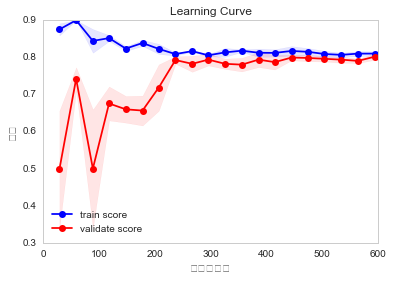

In [162]:
plot_learning_curve(clf, u"Learning Curve", X_train, Y_train)

(0.71729751778289308, 0.32630452669178334)

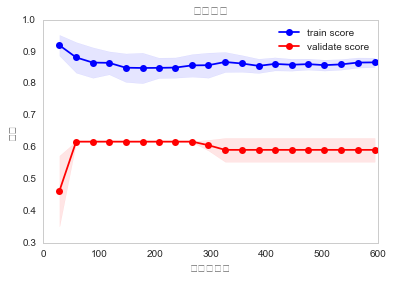

In [151]:
plot_learning_curve(svc, u"Learning Curve", X_train, y_train)

In [153]:
train_sizes, train_scores, test_scores = learning_curve(
        clf, X_train, y_train, cv=3, n_jobs=-1)

In [154]:
train_sizes

array([ 59, 193, 326, 460, 594])

In [155]:
train_scores

array([[ 0.89830508,  0.89830508,  0.89830508],
       [ 0.80829016,  0.83937824,  0.83937824],
       [ 0.82822086,  0.8006135 ,  0.80674847],
       [ 0.8326087 ,  0.80434783,  0.80434783],
       [ 0.81649832,  0.80639731,  0.8030303 ]])

In [157]:
np.mean(train_scores,axis=1)

array([ 0.89830508,  0.82901554,  0.81186094,  0.81376812,  0.80864198])

In [161]:
np.mean(train_scores,axis=0)

array([ 0.83678462,  0.82980839,  0.83036198])

In [167]:
# fit到BaggingRegressor之中
from sklearn.ensemble import BaggingRegressor
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X_train, y_train)
Y_pred=bagging_clf.predict(X_test)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('../output/titanic_bagging_clf.csv', index=False)

In [168]:
print bagging_clf.score(X_train,y_train)

0.278237704918


(0.29249119675283453, 0.11981888255774012)

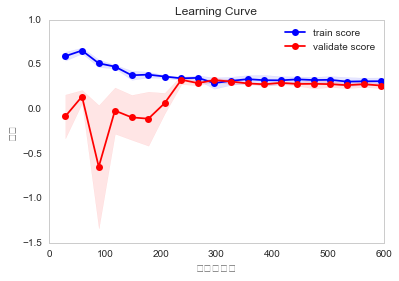

In [169]:
#拟合分析
plot_learning_curve(bagging_clf, u"Learning Curve", X_train, y_train)

调整参数